# **Customer Churn**

*Customer churn, also known as customer attrition, refers to the loss of customers or clients over a given period. In the context of a business, it is the percentage of subscribers to a service who discontinue their subscriptions within a given time period. Understanding and analyzing customer churn is crucial for businesses because retaining existing customers is generally more cost-effective than acquiring new ones.*

*The churn rate is the percentage of customers who leave a service over a specific period.*

*By systematically analyzing customer churn, businesses can develop effective strategies to retain customers, improve customer satisfaction, and ultimately enhance profitability.*

In [22]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

### **LOAD DATA**

In [3]:
import pandas as pd # type: ignore
df = pd.read_csv(r"C:\Users\konal\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### **STUDY DATA**

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of 7043 entries and 21 columns.

The **TotalCharges** column is currently of type object, but it should be a numerical type (float64).

Convert the **TotalCharges** column to a numerical type and handle any potential issues during the conversion.

In [4]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' will introduce NaNs for conversion errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check for null values
null_values = df.isnull().sum()
null_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df['TotalCharges'].dtype

dtype('float64')

* The **TotalCharges** column had 11 missing values after conversion to numeric.
* All other columns have complete data.

### **HANDLE NULL VALUES AND OUTLIERS**

**Handle Null Values**

* We'll fill the missing **TotalCharges** values with the median value, as it's a common method to handle numerical missing values without significantly distorting the data.

In [6]:
# Fill missing values in 'TotalCharges' with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Verify there are no more null values
null_values_after = df.isnull().sum()
null_values_after


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**OUTLIERS**

In [7]:
# Function to calculate and count outliers
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers)

# Identify and count outliers
outliers_monthlycharges, num_outliers_monthlycharges = count_outliers('MonthlyCharges')
outliers_totalcharges, num_outliers_totalcharges = count_outliers('TotalCharges')
outliers_tenure, num_outliers_tenure = count_outliers('tenure')


# Print the number of outliers for each column
print(f"Number of outliers in MonthlyCharges: {num_outliers_monthlycharges}")
print(f"Number of outliers in TotalCharges: {num_outliers_totalcharges}")
print(f"Number of outliers in tenure: {num_outliers_tenure}")

Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Number of outliers in tenure: 0


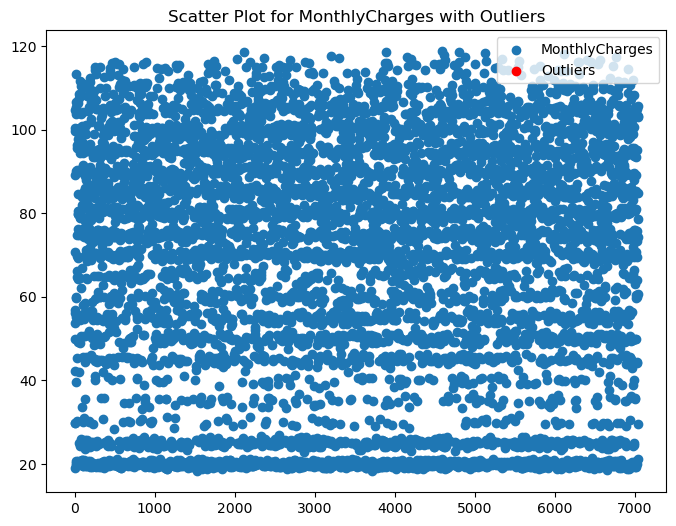

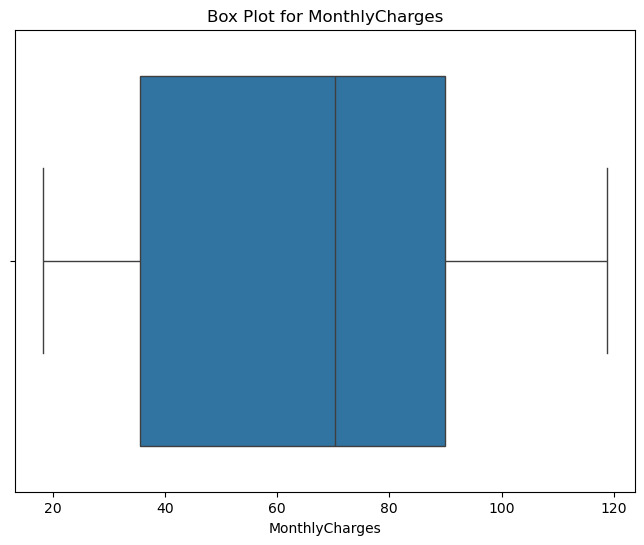

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['MonthlyCharges'], label='MonthlyCharges')
plt.scatter(outliers_monthlycharges.index, outliers_monthlycharges['MonthlyCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for MonthlyCharges with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot for MonthlyCharges')
plt.show()

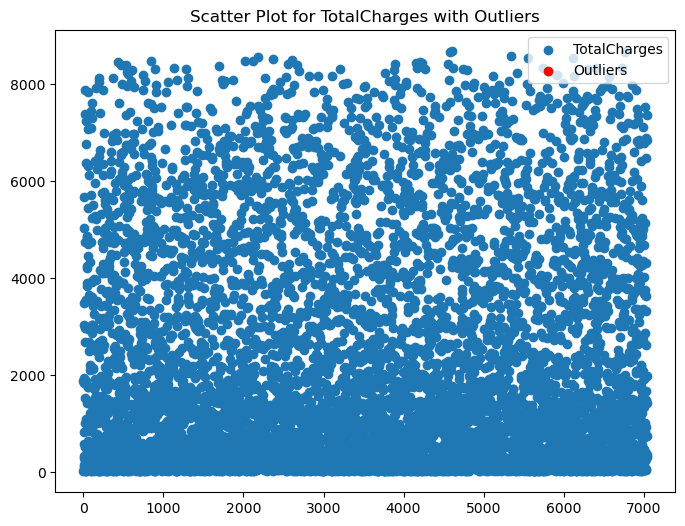

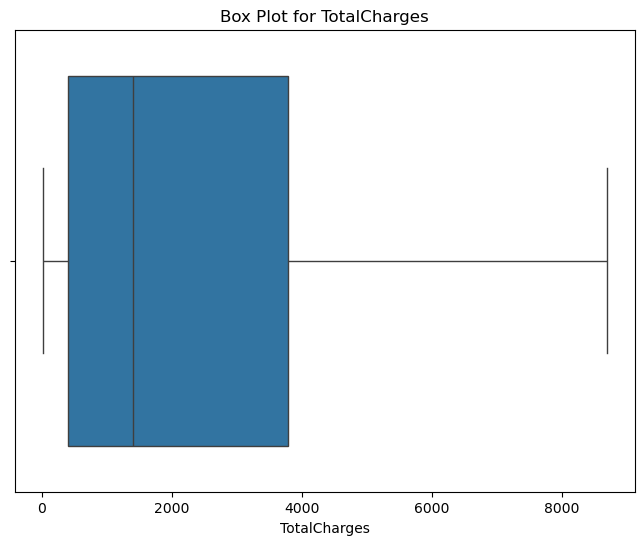

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['TotalCharges'], label='TotalCharges')
plt.scatter(outliers_totalcharges.index, outliers_totalcharges['TotalCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for TotalCharges with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot for TotalCharges')
plt.show()

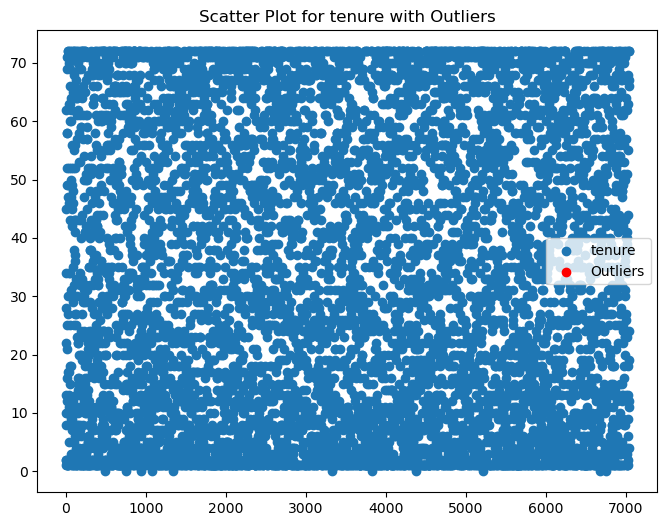

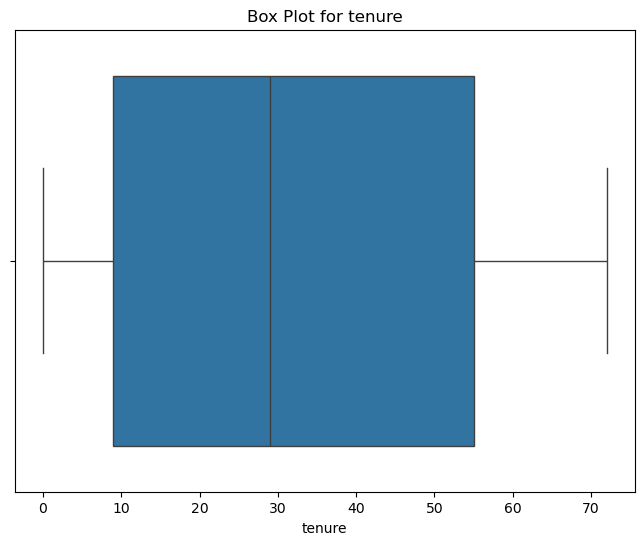

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['tenure'], label='tenure')
plt.scatter(outliers_tenure.index, outliers_tenure['tenure'], color='red', label='Outliers')
plt.title('Scatter Plot for tenure with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot for tenure')
plt.show()

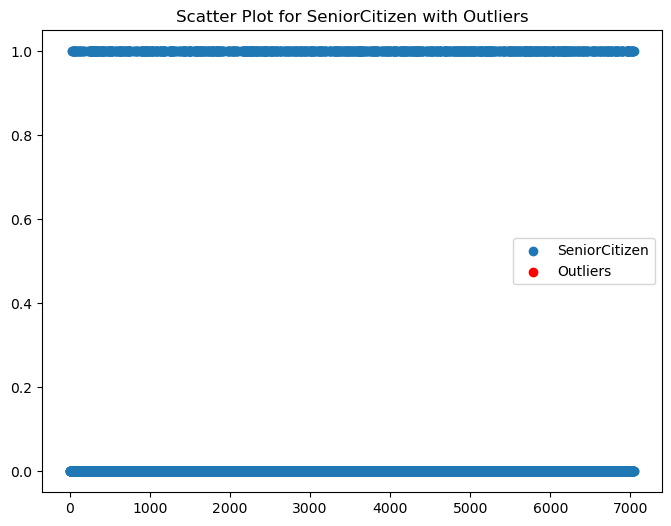

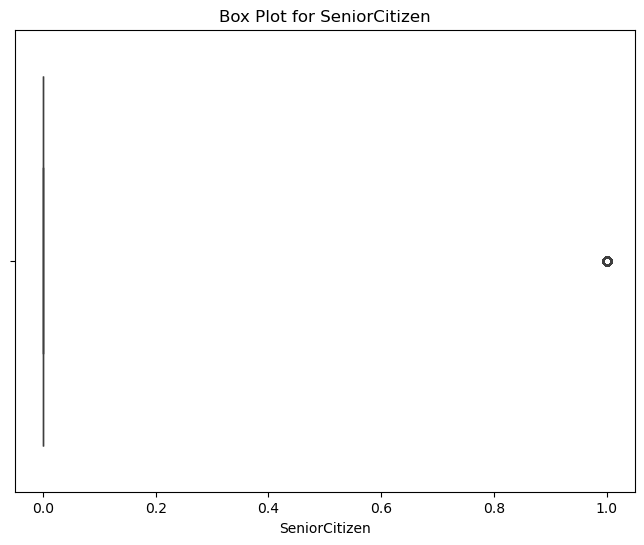

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['SeniorCitizen'], label='SeniorCitizen')
plt.scatter(outliers_tenure.index, outliers_tenure['SeniorCitizen'], color='red', label='Outliers')
plt.title('Scatter Plot for SeniorCitizen with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SeniorCitizen'])
plt.title('Box Plot for SeniorCitizen')
plt.show()


# Display the value counts
senior_citizen_counts = df['SeniorCitizen'].value_counts()
print(senior_citizen_counts)

In [12]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# **Exploratory Data Analysis (EDA)**

In [13]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"Churn Rate: {churn_rate}")

Churn Rate: Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


### **Univariate Analysis**

Univariate analysis is a statistical method that focuses on analyzing each variable in a dataset individually.

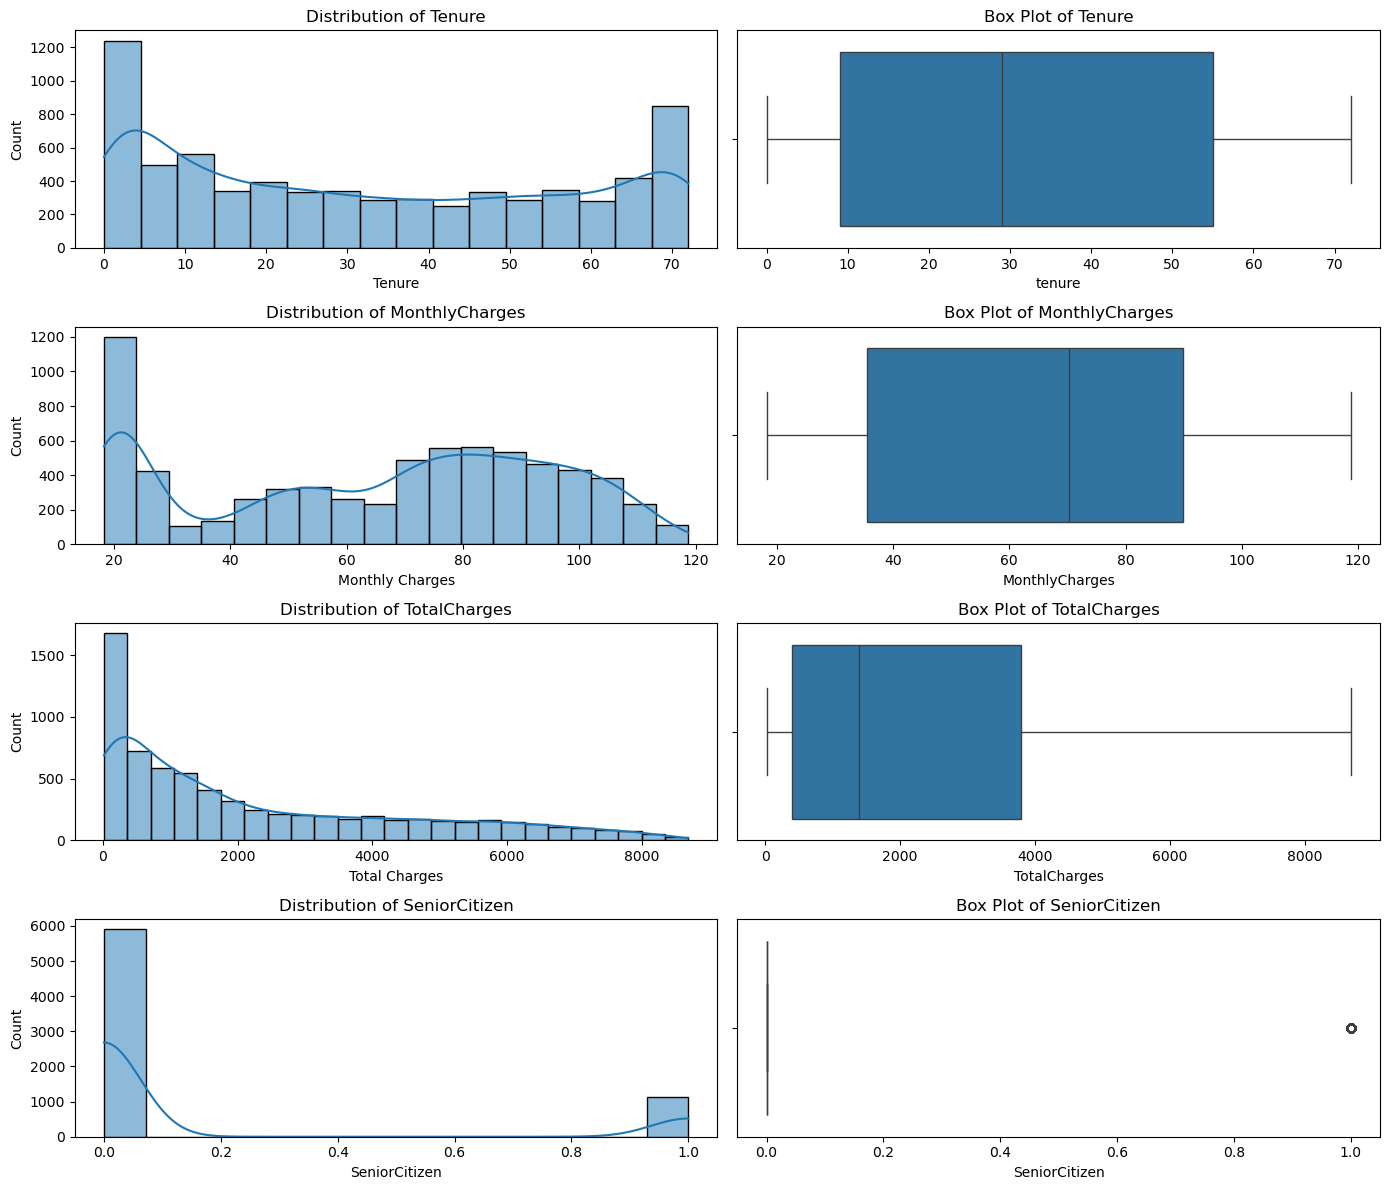

In [14]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Numerical variables: 'tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen'

plt.figure(figsize=(14, 12))

plt.subplot(4, 2, 1)
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')

plt.subplot(4, 2, 2)
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')

plt.subplot(4, 2, 3)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('Monthly Charges')

plt.subplot(4, 2, 4)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of MonthlyCharges')

plt.subplot(4, 2, 5)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of TotalCharges')
plt.xlabel('Total Charges')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of TotalCharges')

plt.subplot(4, 2, 7)
sns.histplot(df['SeniorCitizen'], kde=True)
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')

plt.subplot(4, 2, 8)
sns.boxplot(x=df['SeniorCitizen'])
plt.title('Box Plot of SeniorCitizen')

plt.tight_layout()
plt.show()


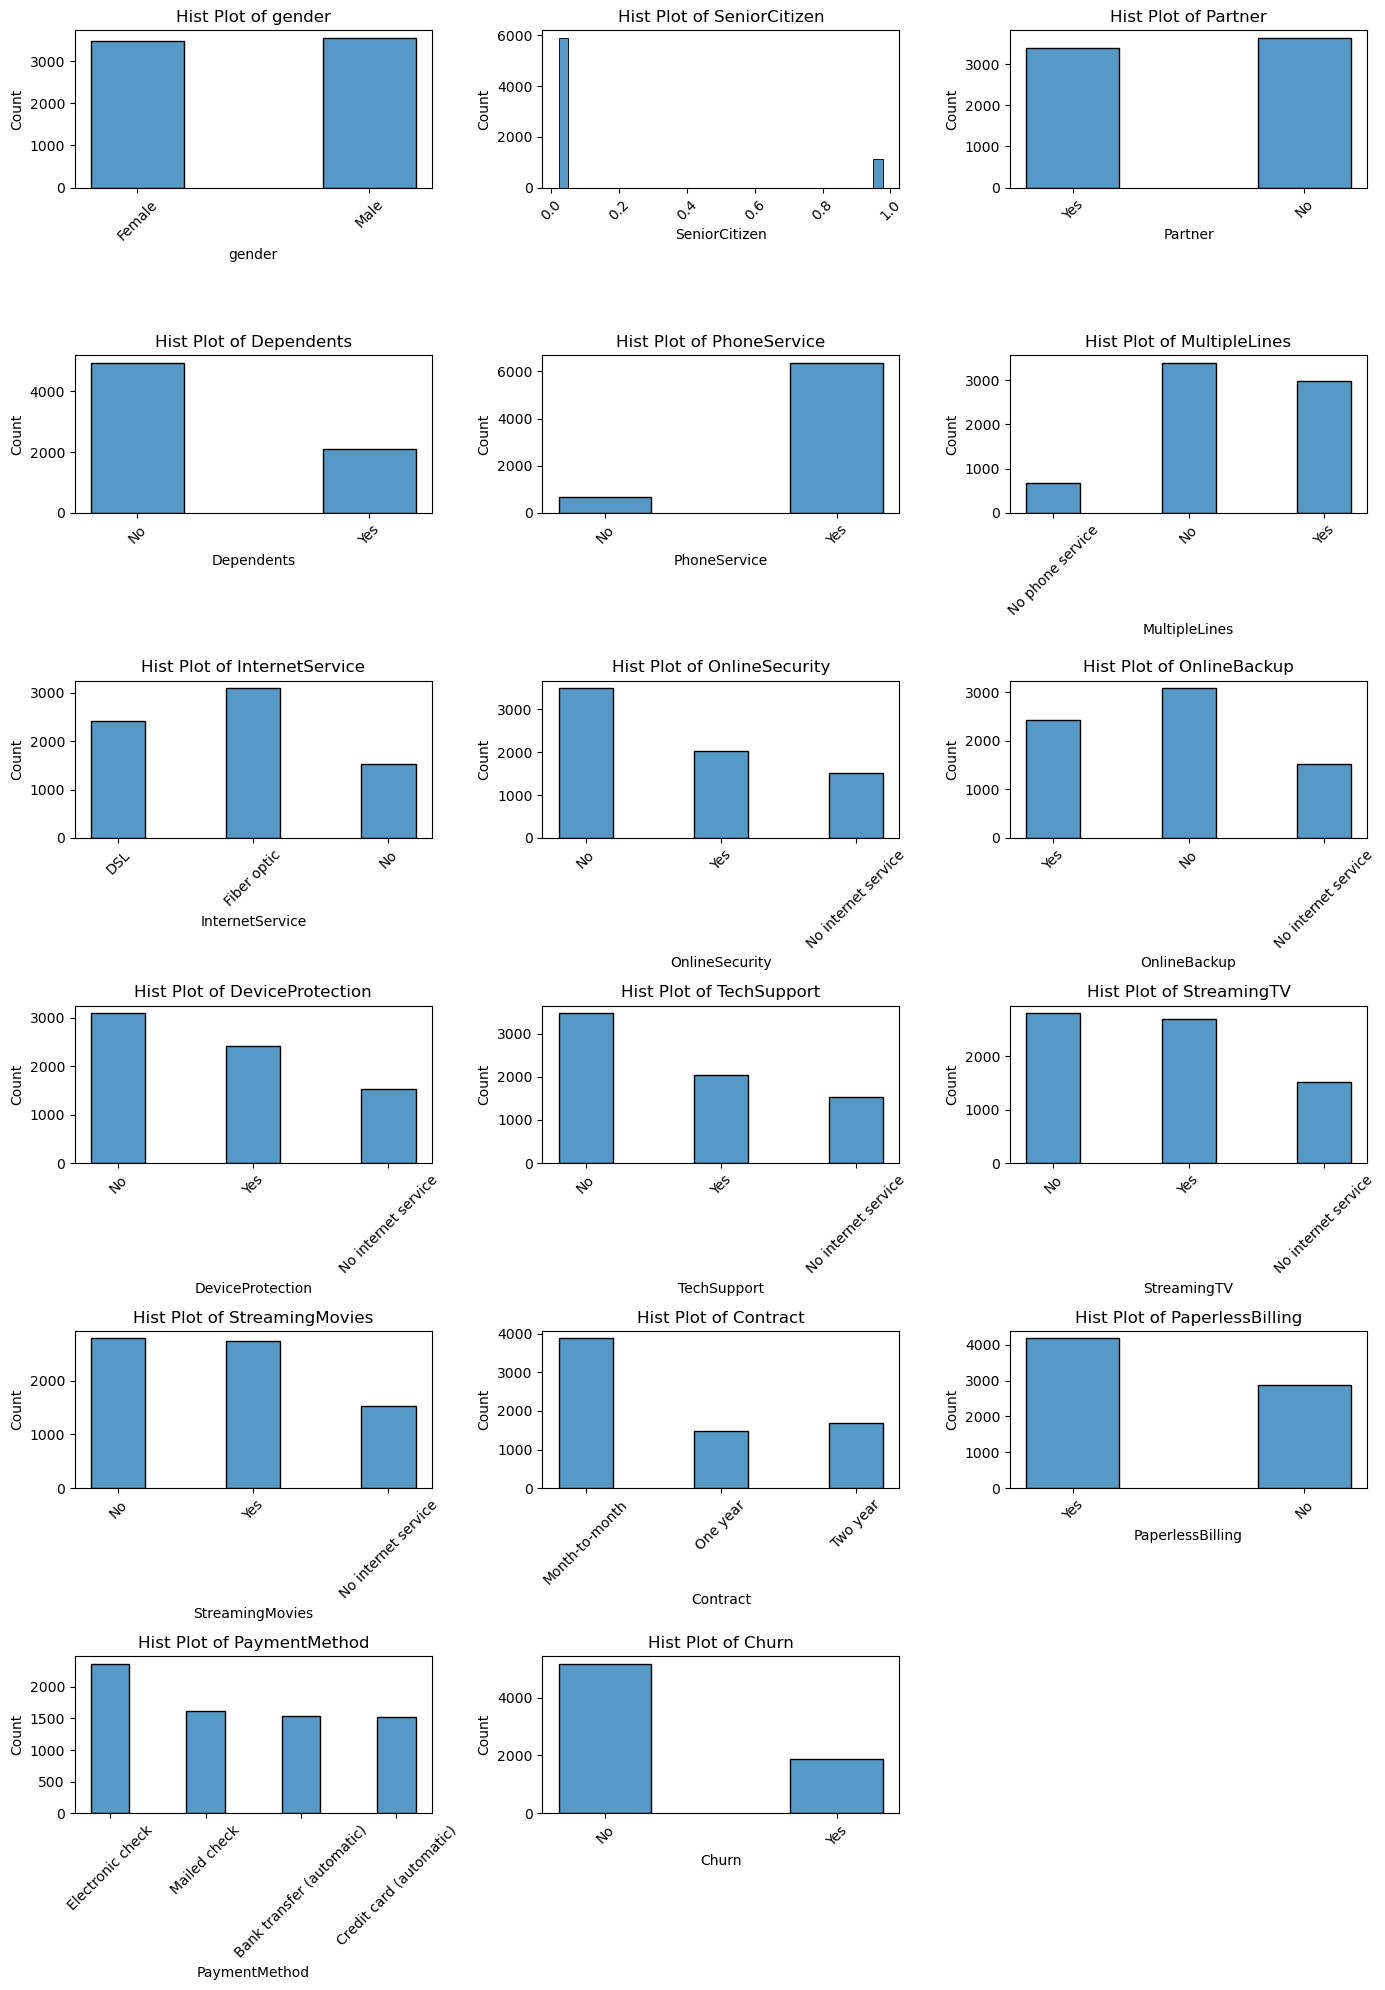

In [15]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(14, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(x=df[column],multiple='dodge',shrink=0.4)
    plt.title(f'Hist Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **BIVARIATE ANALYSIS**

Bivariate analysis is a statistical method that examines the relationship between two variables. It explores if and how two variables are associated or correlated with each other.

**Gender Vs Churn**

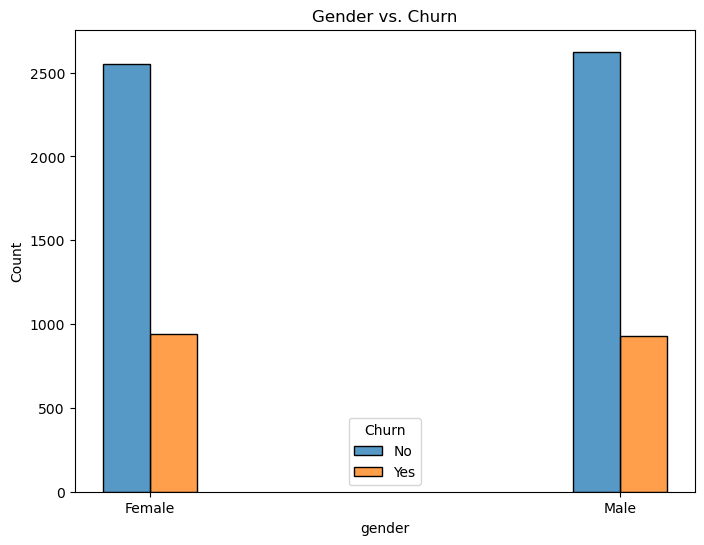

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(x='gender', hue='Churn', data=df, shrink=0.2, multiple='dodge')
plt.title('Gender vs. Churn')
plt.show()

*Observation:* There is no significant difference in churn rates between male and female customers.

**SeniorCitizen vs. Churn**

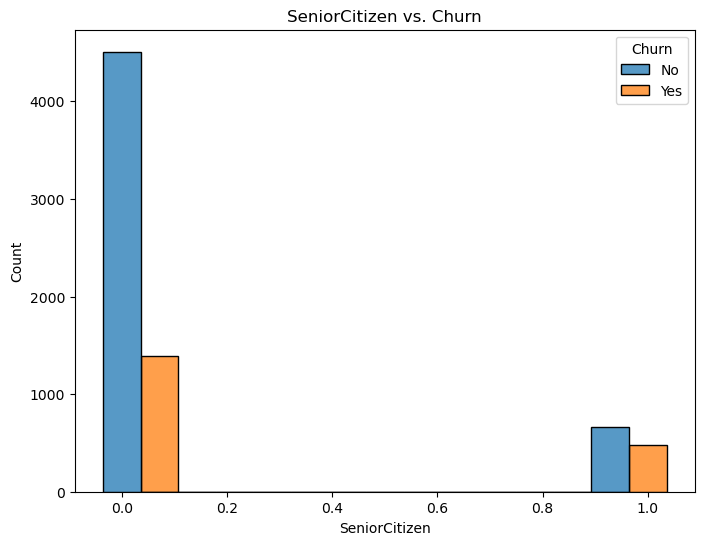

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(x='SeniorCitizen', hue='Churn', data=df, shrink = 2, multiple='dodge')
plt.title('SeniorCitizen vs. Churn')
plt.show()

*Observation:* Senior citizens have a higher churn rate compared to non-senior citizens.

**Partner vs. Churn**

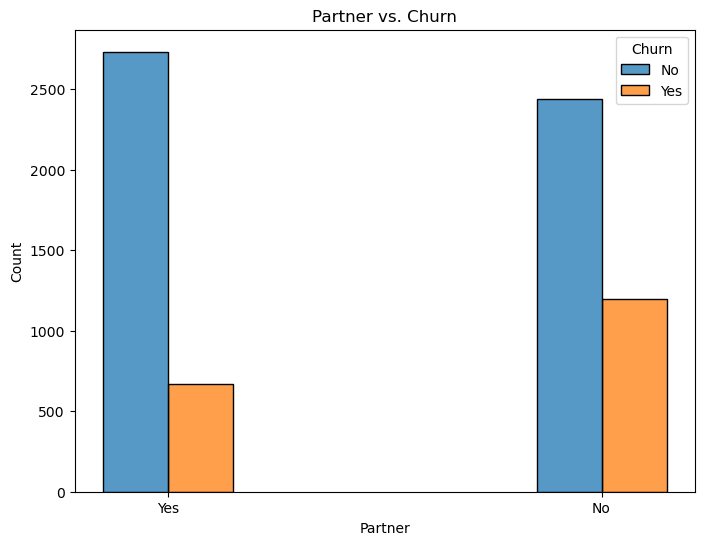

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Partner', hue='Churn',data=df, shrink=0.3, multiple='dodge')
plt.title('Partner vs. Churn')
plt.show()

*Observation:* Customers without partners are more likely to churn.

**Dependents vs. Churn**

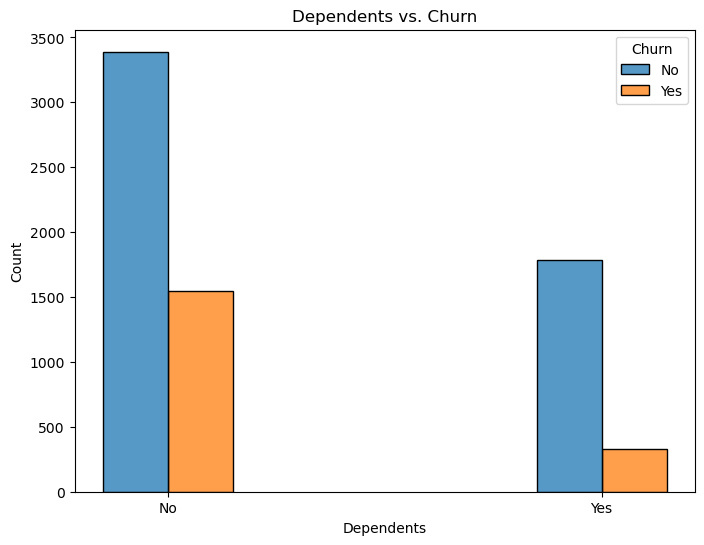

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Dependents', hue='Churn', data=df, shrink=0.3, multiple='dodge')
plt.title('Dependents vs. Churn')
plt.show()

*Observation:* Customers without dependents have a higher churn rate.

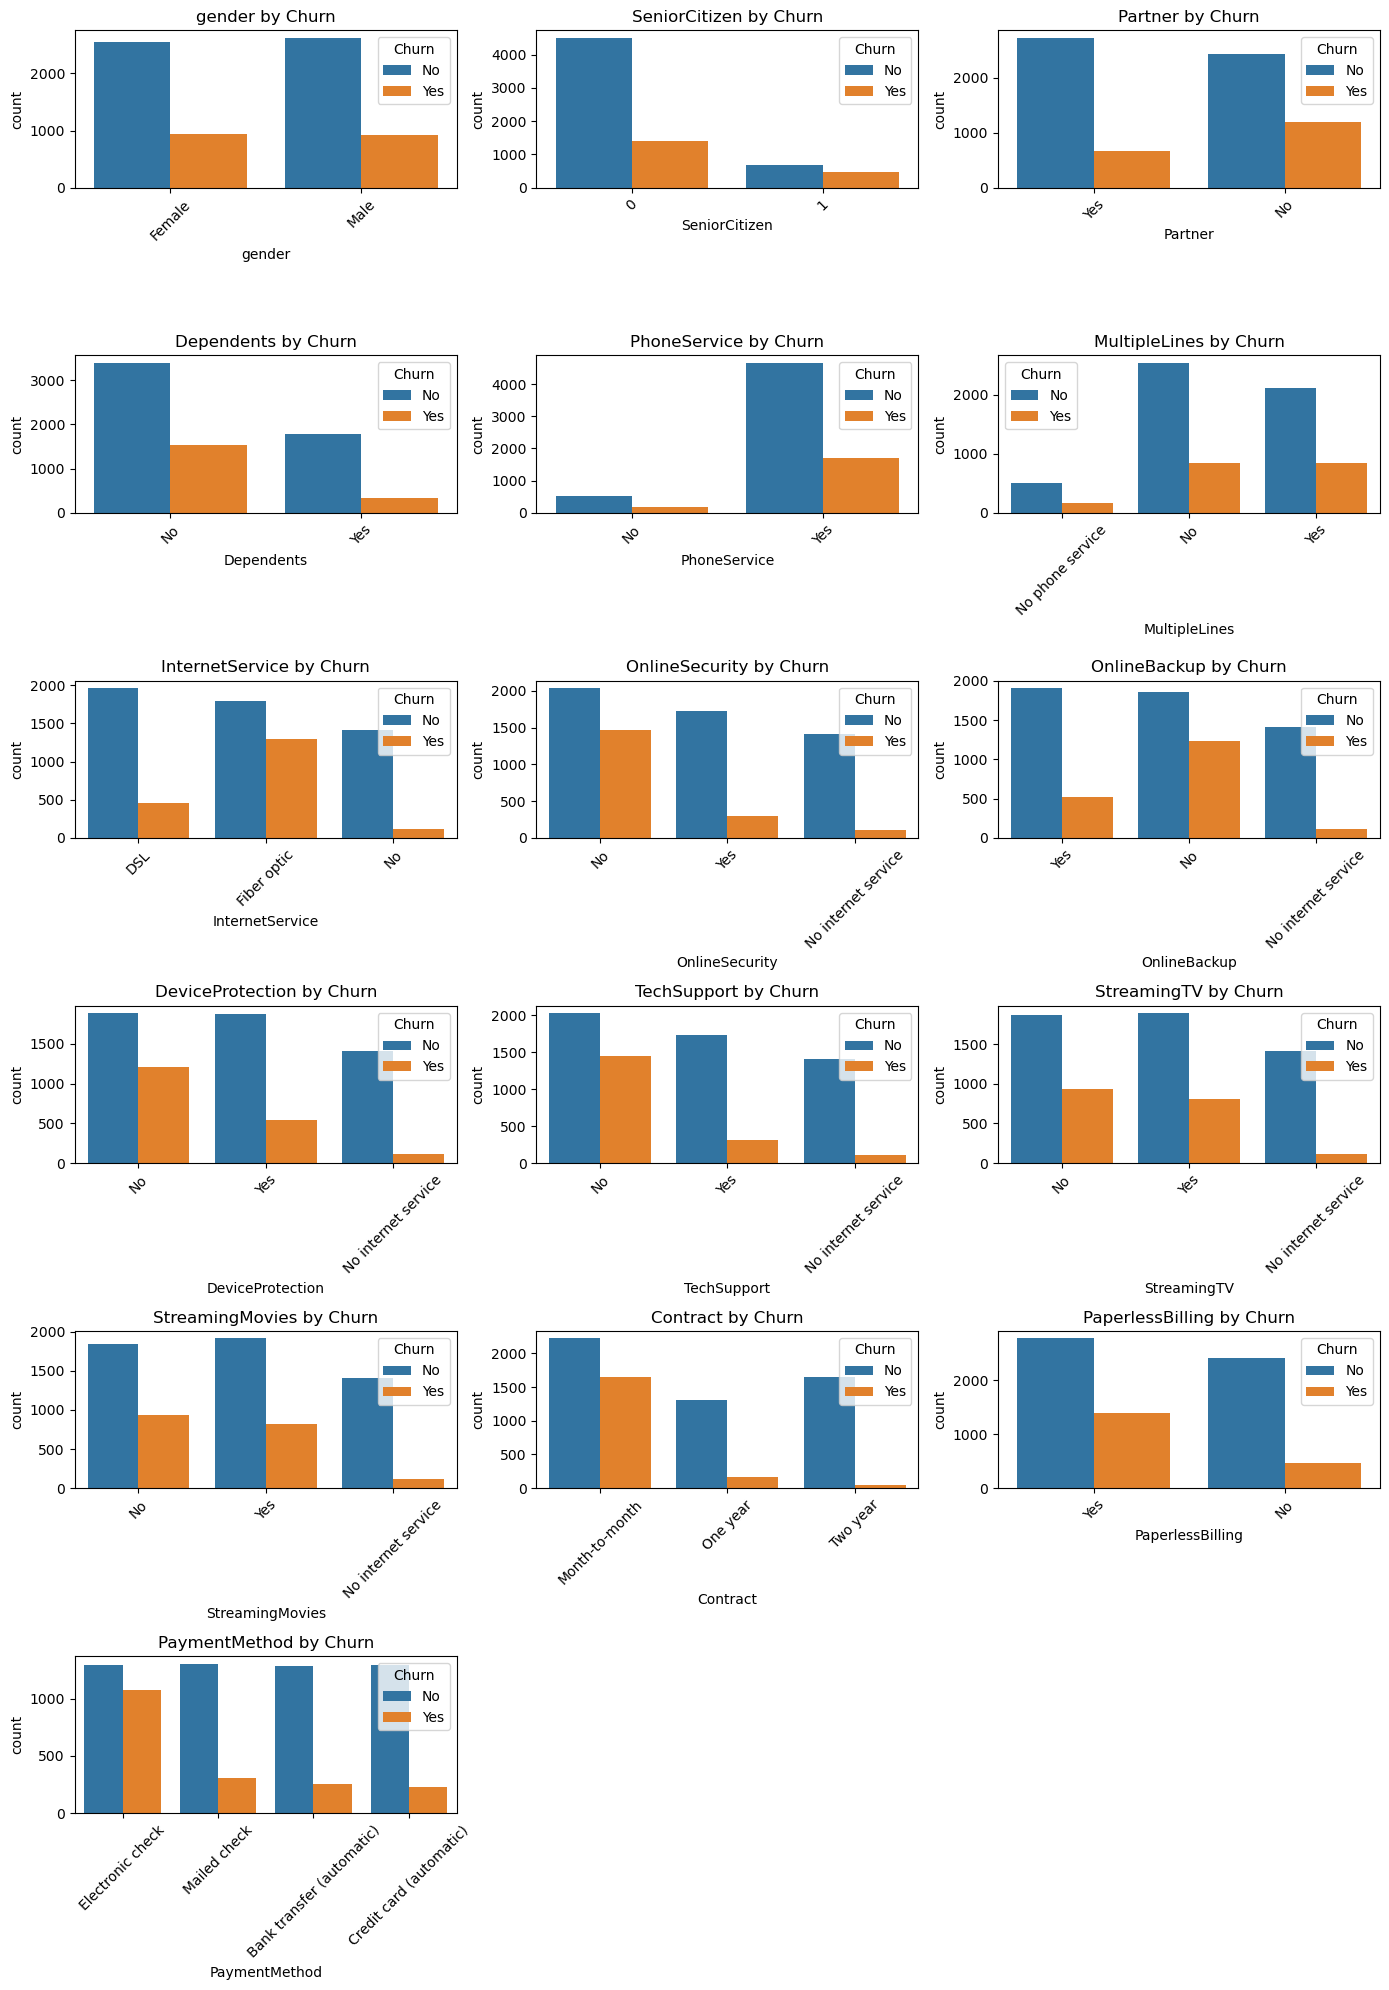

In [20]:
plt.figure(figsize=(14, 20))
for i, column in enumerate(categorical_columns[:-1], 1):   # type: ignore
    plt.subplot(6, 3, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} by Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# categorical_columns[:-1] ==> Excludes Churn

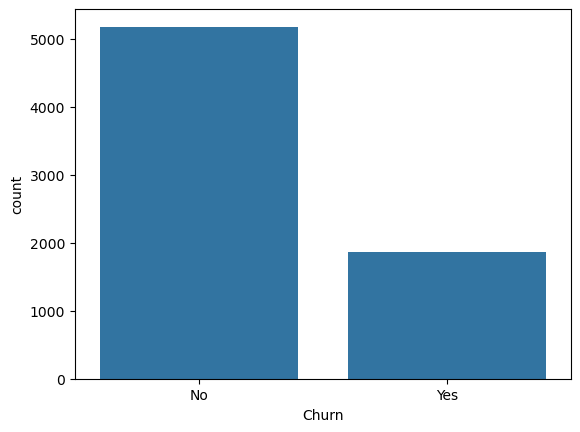

In [21]:
sns.countplot(x='Churn', data=df)
plt.show()